<a href="https://colab.research.google.com/github/SeohyeonSunny/Topic-Modeling/blob/main/KOTE_%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D_%EC%9D%91%EC%9A%A9%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager
import subprocess

# 한글 폰트 설치 및 설정
subprocess.run(['apt-get', 'update'])
subprocess.run(['apt-get', '-qq', 'install', '-y', 'fonts-nanum'])

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 구글 드라이브 마운트
drive.mount('/content/drive')

# Before 파일 불러오기
before_file_path = '/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx'
result_before_df = pd.read_excel(before_file_path)

# After 파일 불러오기
after_file_path = '/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx'
result_after_df = pd.read_excel(after_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-eaa71f64aec3>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(emotions))


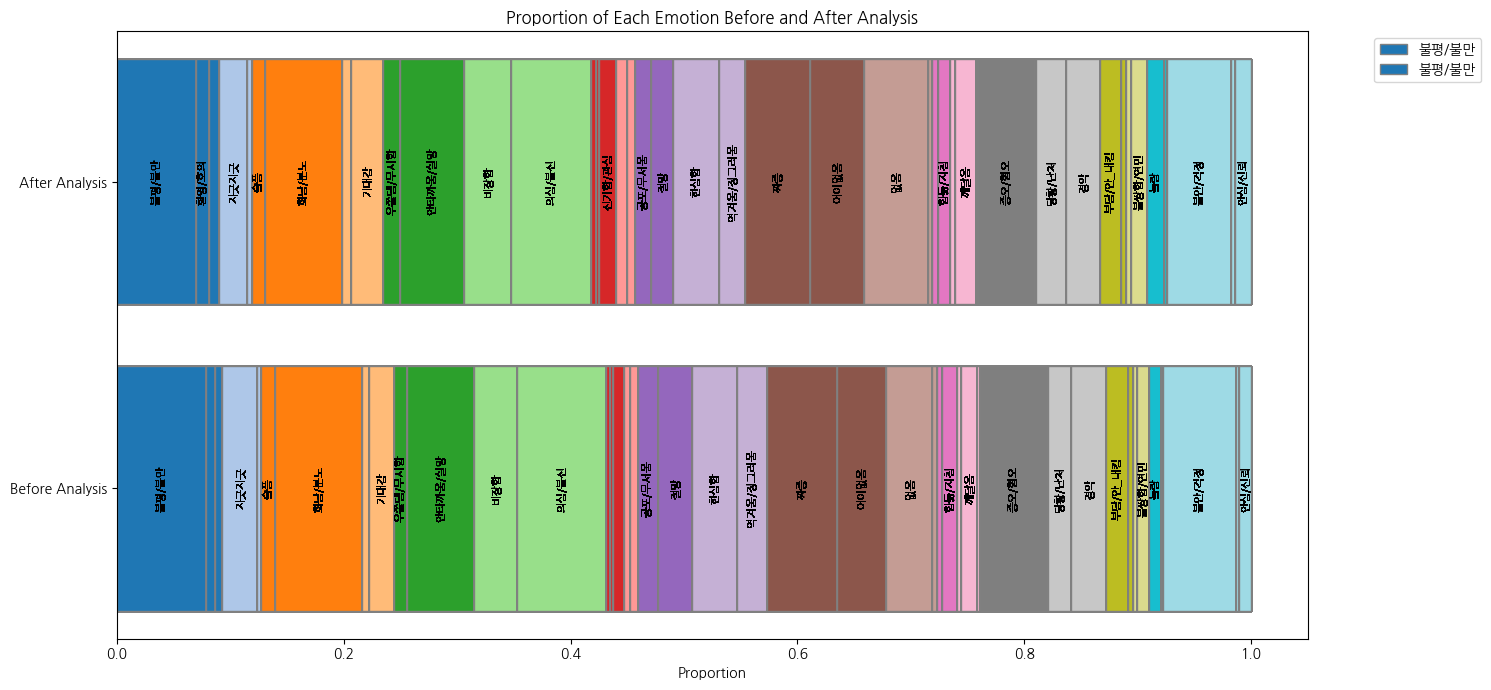

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided Excel files
before_analysis_path = '/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx'
after_analysis_path = '/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx'

before_df = pd.read_excel(before_analysis_path)
after_df = pd.read_excel(after_analysis_path)

# Emotions list (excluding the Comment column)
emotions = before_df.columns[:-1]

# Sum the proportions for each emotion in the before and after datasets
before_sums = before_df[emotions].sum()
after_sums = after_df[emotions].sum()

# Normalize the sums to get the proportion of each emotion
before_proportions = before_sums / before_sums.sum()
after_proportions = after_sums / after_sums.sum()

# Define a color map for emotions
color_map = plt.cm.get_cmap('tab20', len(emotions))
color_dict = {emotion: color_map(i) for i, emotion in enumerate(emotions)}

# Creating a horizontal stacked bar chart for before and after data
fig, ax = plt.subplots(figsize=(15, 7))

# Bottom values for stacking
bottom_before = [0] * len(before_proportions)
bottom_after = [0] * len(after_proportions)

# Creating bars for each emotion
for i, emotion in enumerate(emotions):
    # Before Analysis Bar
    ax.barh('Before Analysis', before_proportions[emotion], left=bottom_before, color=color_dict[emotion], edgecolor='grey', label=emotion if bottom_before[0] == 0 else "")
    for j in range(len(bottom_before)):
        if before_proportions[emotion] > 0.01:  # Show text only if the segment is large enough
            ax.text(bottom_before[j] + before_proportions[emotion] / 2, 'Before Analysis', emotion, ha='center', va='center', rotation=90, color='black', fontsize=8)
    bottom_before = [x + before_proportions[emotion] for x in bottom_before]

    # After Analysis Bar
    ax.barh('After Analysis', after_proportions[emotion], left=bottom_after, color=color_dict[emotion], edgecolor='grey', label=emotion if bottom_after[0] == 0 else "")
    for j in range(len(bottom_after)):
        if after_proportions[emotion] > 0.01:  # Show text only if the segment is large enough
            ax.text(bottom_after[j] + after_proportions[emotion] / 2, 'After Analysis', emotion, ha='center', va='center', rotation=90, color='black', fontsize=8)
    bottom_after = [x + after_proportions[emotion] for x in bottom_after]

# Adding labels and legend
ax.set_xlabel('Proportion')
ax.set_title('Proportion of Each Emotion Before and After Analysis')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

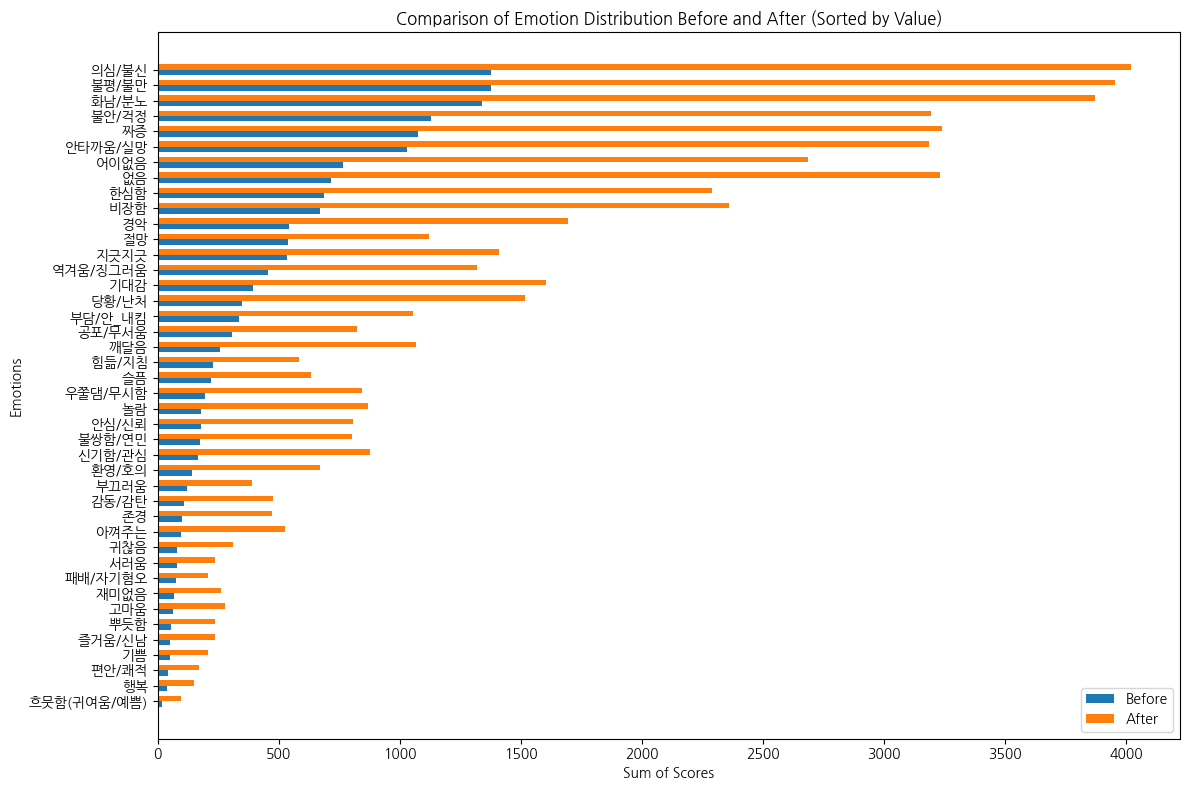

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 특정 레이블의 합계 계산
sum_before = before_data[LABELS].sum()
sum_after = after_data[LABELS].sum()

# 선택한 레이블의 값만 추출 및 높은 값 순서대로 정렬
sorted_indices = np.argsort(sum_before.values)[::-1]
sorted_labels = [LABELS[i] for i in sorted_indices]
sorted_sum_before = [sum_before.values[i] for i in sorted_indices]
sorted_sum_after = [sum_after.values[i] for i in sorted_indices]

# 높은 값이 위로 오도록 뒤집기
sorted_labels = sorted_labels[::-1]
sorted_sum_before = sorted_sum_before[::-1]
sorted_sum_after = sorted_sum_after[::-1]

# 레이블별 분포 비교 시각화 (다중 막대 그래프)
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(sorted_labels))

bar1 = ax.barh(index, sorted_sum_before, bar_width, label='Before')
bar2 = ax.barh(index + bar_width, sorted_sum_after, bar_width, label='After')

ax.set_ylabel('Emotions')
ax.set_xlabel('Sum of Scores')
ax.set_title('Comparison of Emotion Distribution Before and After (Sorted by Value)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_labels)
ax.legend()

plt.tight_layout()
plt.show()


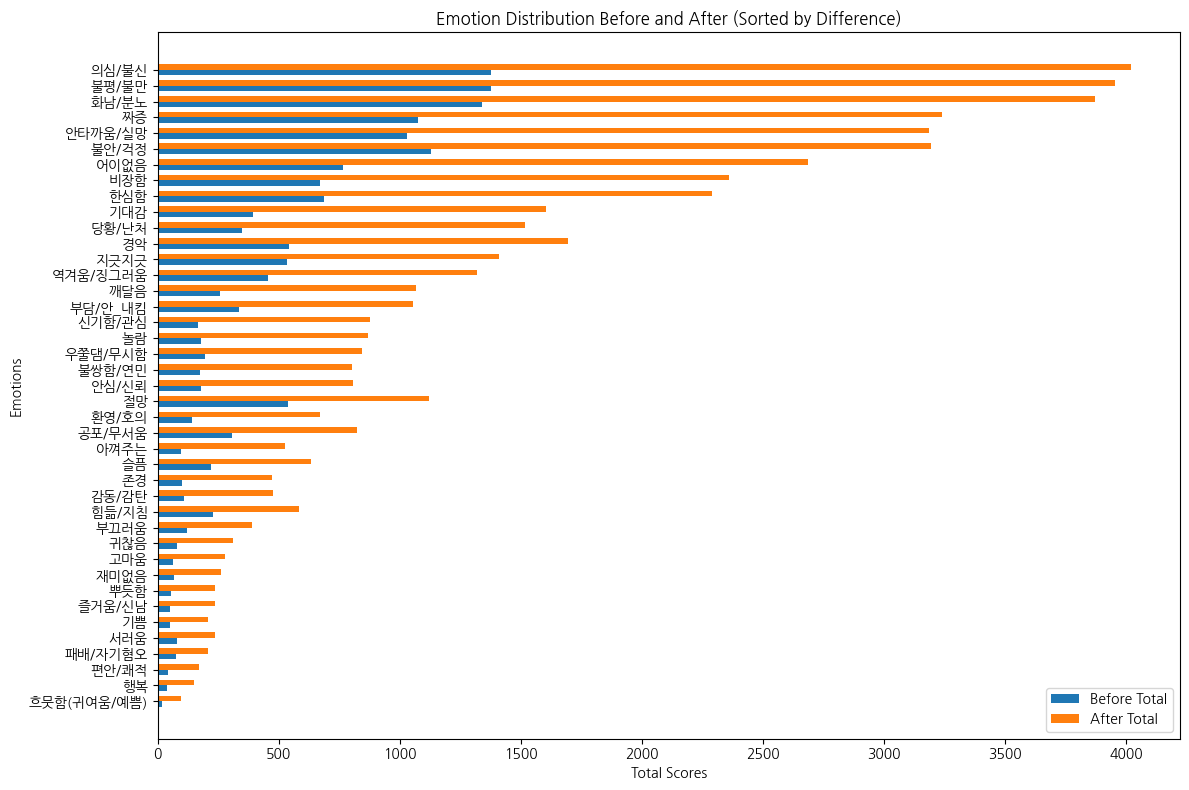

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# Filter the dataframes to include only the specified labels
before_filtered = before_data[LABELS]
after_filtered = after_data[LABELS]

# Sum the values for each emotion in the before and after datasets
before_sums = before_filtered.sum()
after_sums = after_filtered.sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before Total': before_sums,
    'After Total': after_sums
})

# Calculate the difference
comparison_df['Difference'] = comparison_df['After Total'] - comparison_df['Before Total']

# Sort by difference (descending order)
sorted_by_difference = comparison_df.sort_values(by='Difference')

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Total'], bar_width, label='Before Total')
    bar2 = ax.barh(index + bar_width, df['After Total'], bar_width, label='After Total')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot sorted by difference
plot_emotions(sorted_by_difference, 'Emotion Distribution Before and After (Sorted by Difference)')

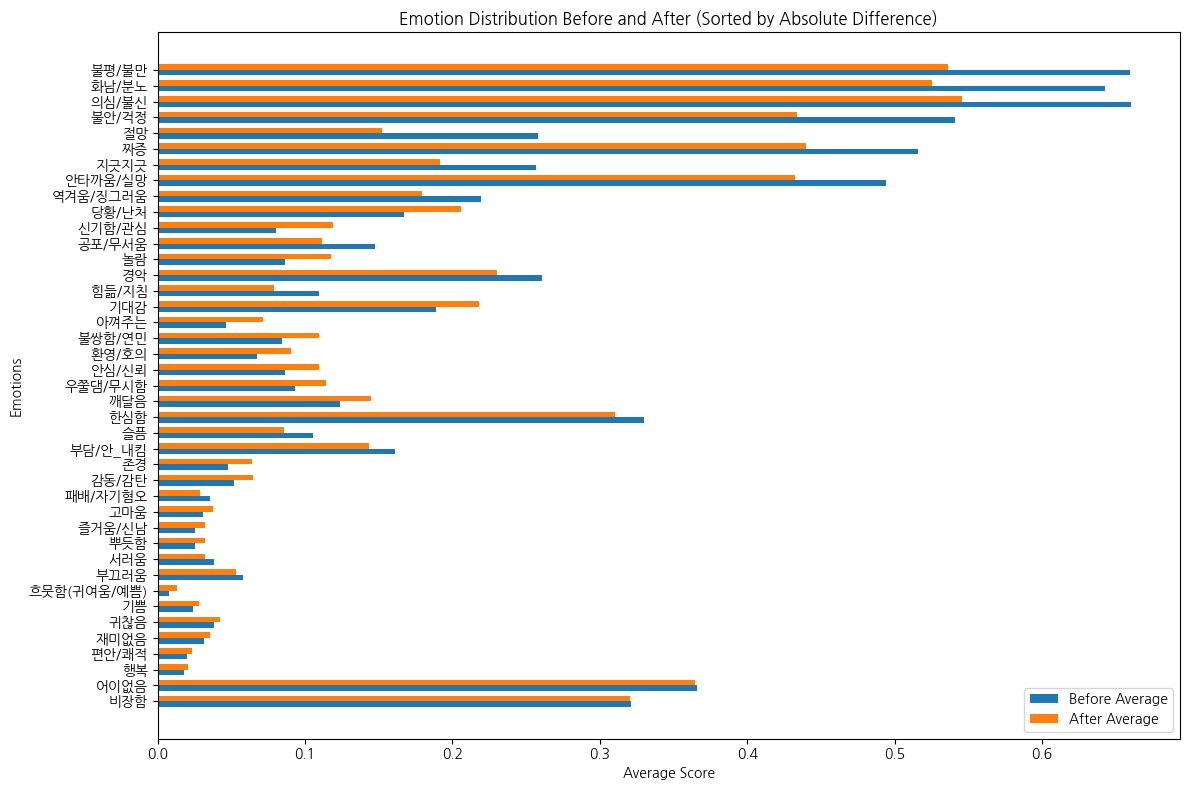

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# Calculate the difference and its absolute value
comparison_df['Difference'] = comparison_df['After Average'] - comparison_df['Before Average']
comparison_df['Absolute Difference'] = comparison_df['Difference'].abs()

# Sort by absolute difference (descending order)
sorted_by_absolute_difference = comparison_df.sort_values(by='Absolute Difference', ascending=True)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Average'], bar_width, label='Before Average')
    bar2 = ax.barh(index + bar_width, df['After Average'], bar_width, label='After Average')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Average Score')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot sorted by absolute difference
plot_emotions(sorted_by_absolute_difference, 'Emotion Distribution Before and After (Sorted by Absolute Difference)')


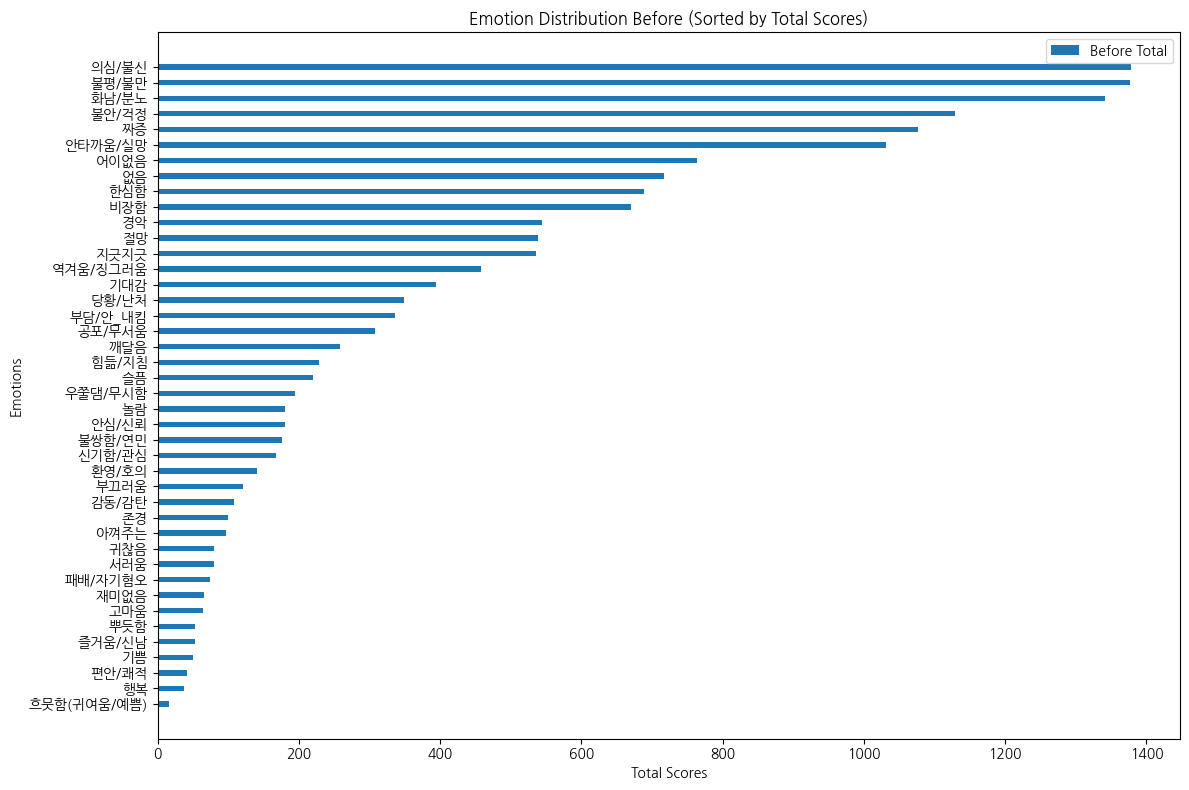

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')

# Filter the dataframe to include only the specified labels
before_filtered = before_data[LABELS]

# Sum the values for each emotion in the before dataset
before_sums = before_filtered.sum()

# 결과를 내림차순으로 정렬
sorted_before_sums = before_sums.sort_values(ascending=True)

# Plotting function
def plot_emotions(sums, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(sums))

    bar1 = ax.barh(index, sums, bar_width, label='Before Total')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index)
    ax.set_yticklabels(sums.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 값이 높은 순으로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_before_sums, 'Emotion Distribution Before (Sorted by Total Scores)')

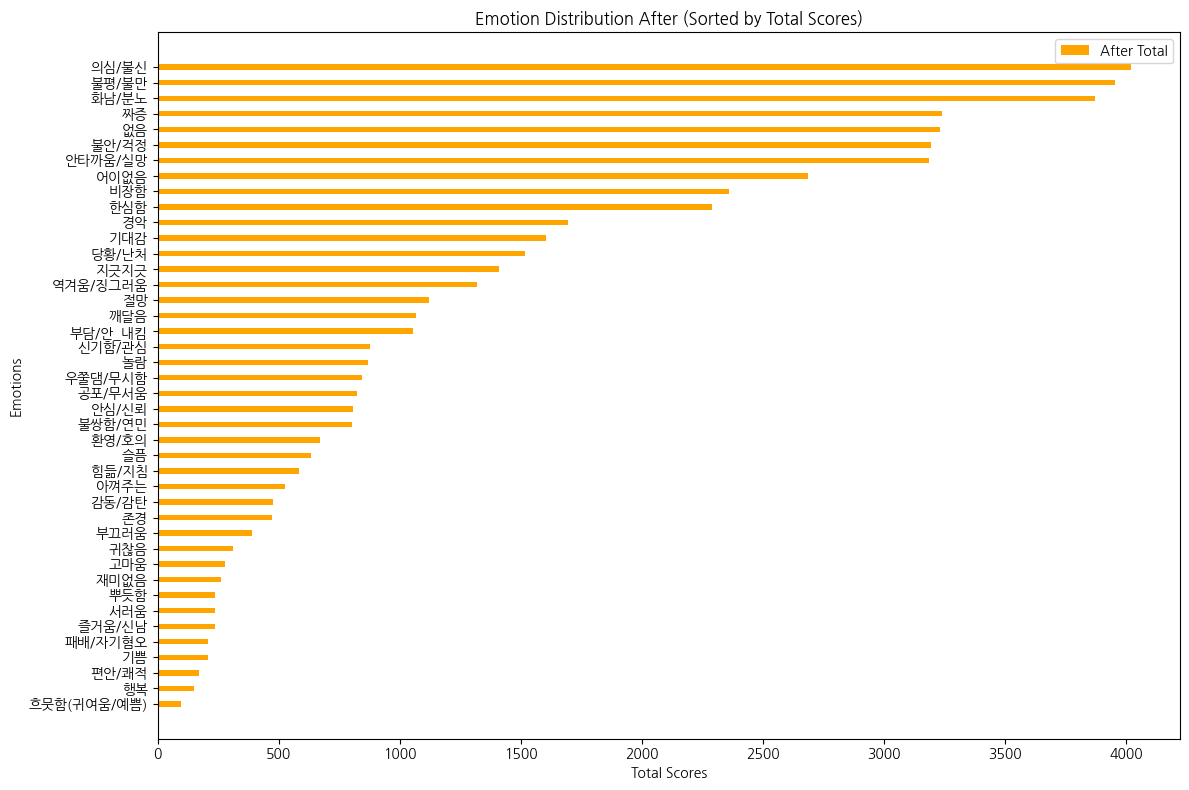

In [ ]:
LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# Filter the dataframe to include only the specified labels
after_filtered = after_data[LABELS]

# Sum the values for each emotion in the after dataset
after_sums = after_filtered.sum()

# 결과를 내림차순으로 정렬
sorted_after_sums = after_sums.sort_values(ascending=True)

# Plotting function
def plot_emotions(sums, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(sums))

    bar1 = ax.barh(index, sums, bar_width, label='After Total', color='orange')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index)
    ax.set_yticklabels(sums.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 값이 높은 순으로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_after_sums, 'Emotion Distribution After (Sorted by Total Scores)')

<ipython-input-11-c863afd2be3e>:59: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


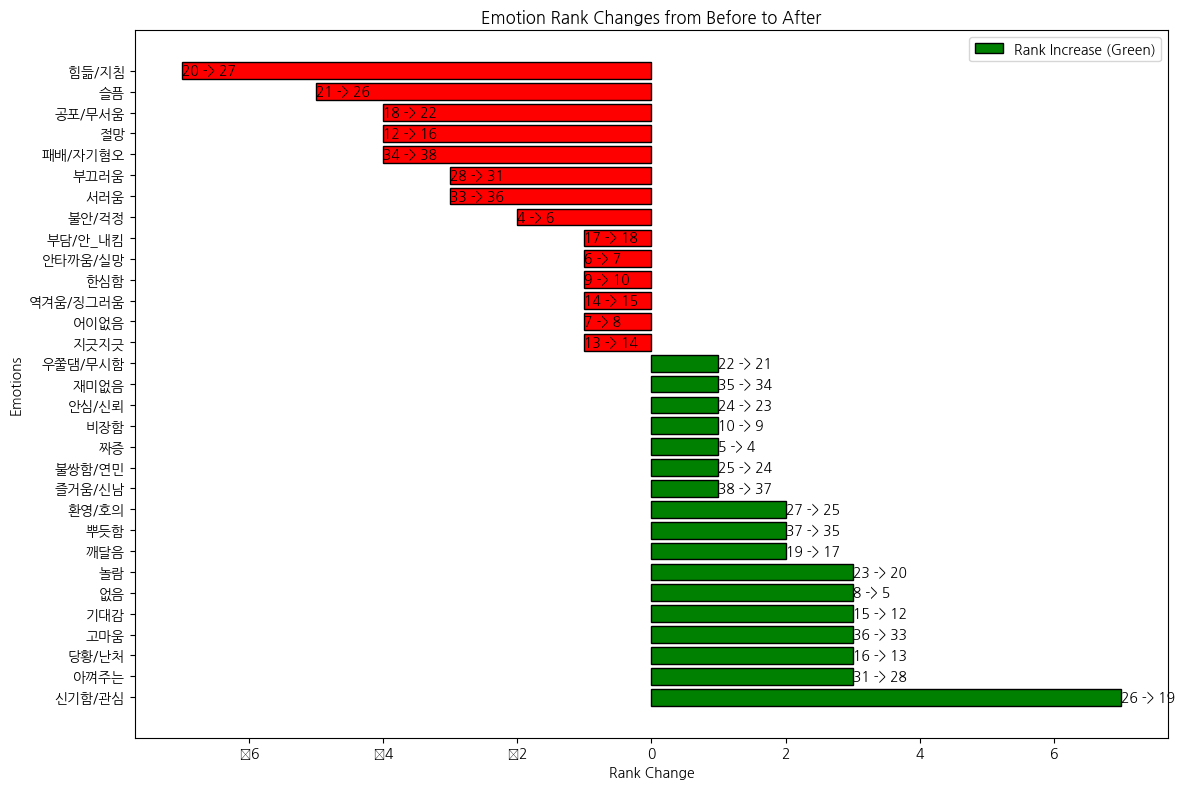

In [ ]:
LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# Filter the dataframes to include only the specified labels
before_filtered = before_data[LABELS]
after_filtered = after_data[LABELS]

# Sum the values for each emotion in the before and after datasets
before_sums = before_filtered.sum()
after_sums = after_filtered.sum()

# 순위 계산
before_ranks = before_sums.rank(ascending=False)
after_ranks = after_sums.rank(ascending=False)

# 순위 변화 계산
rank_changes = before_ranks - after_ranks

# 순위가 변한 레이블만 필터링
changed_ranks = rank_changes[rank_changes != 0]

# 결과를 순위 변화 크기로 정렬
sorted_changes = changed_ranks.sort_values(ascending=False)

# Plotting function
def plot_rank_changes(changes, before_ranks, after_ranks, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    index = np.arange(len(changes))

    # 순위가 올라간 감정은 녹색, 내려간 감정은 빨간색으로 표시
    colors = ['red' if x < 0 else 'green' for x in changes]

    bars = ax.barh(index, changes, color=colors, edgecolor='black')

    # 각 막대 위에 순위 변화와 각각의 순위 표시
    for i, (bar, change) in enumerate(zip(bars, changes)):
        rank_before = int(after_ranks[changes.index[i]] + change)
        rank_after = int(after_ranks[changes.index[i]])
        # 숫자를 정수로 변환하여 표시
        ax.text(bar.get_width(), i, f'{int(before_ranks[changes.index[i]])} -> {int(after_ranks[changes.index[i]])}', va='center', color='black')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Rank Change')
    ax.set_title(title)
    ax.set_yticks(index)
    ax.set_yticklabels(changes.index)
    ax.legend(['Rank Increase (Green)', 'Rank Decrease (Red)'])

    plt.tight_layout()
    plt.show()

# 순위 변화 크기로 정렬된 데이터로 순위 변화 플롯
plot_rank_changes(sorted_changes, before_ranks, after_ranks, 'Emotion Rank Changes from Before to After')

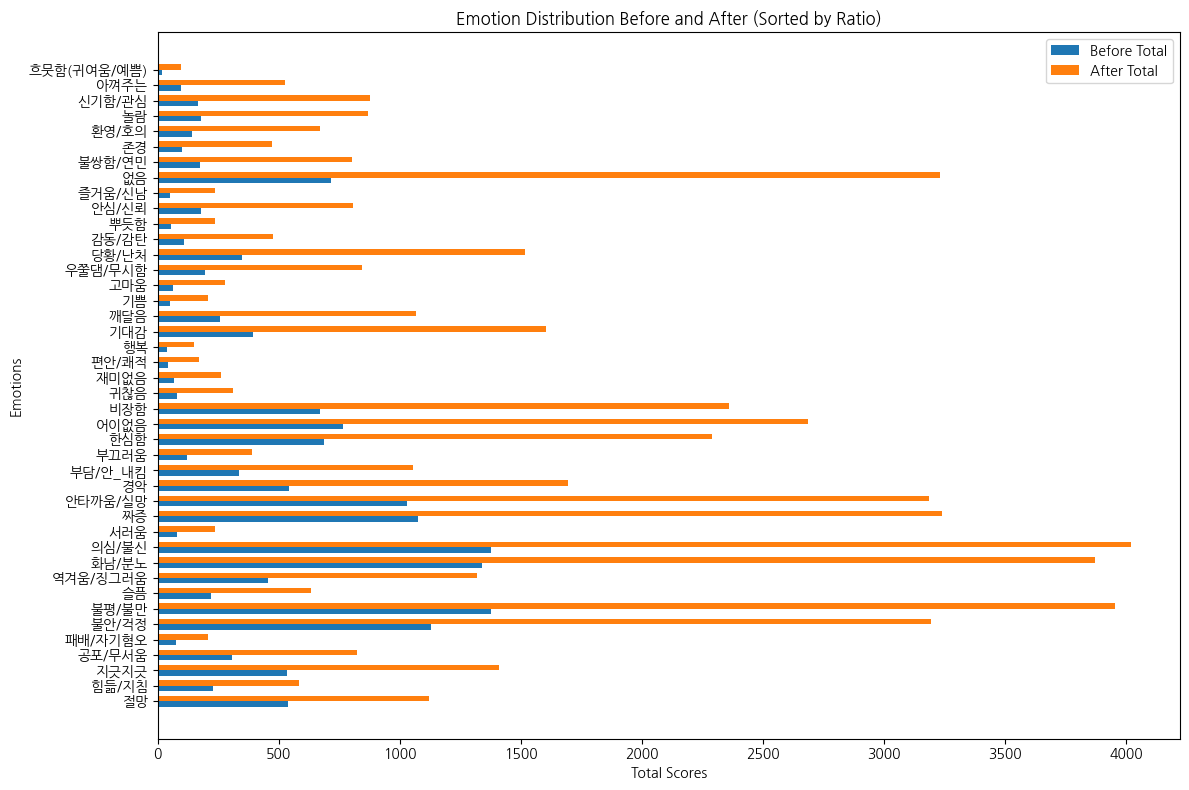

In [ ]:
LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# Filter the dataframes to include only the specified labels
before_filtered = before_data[LABELS]
after_filtered = after_data[LABELS]

# Sum the values for each emotion in the before and after datasets
before_sums = before_filtered.sum()
after_sums = after_filtered.sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before Total': before_sums,
    'After Total': after_sums
})

# 비율 계산을 위한 새로운 컬럼 추가
# 0으로 나누는 것을 방지하기 위해 작은 수를 분모에 추가합니다.
comparison_df['Ratio'] = comparison_df['After Total'] / (comparison_df['Before Total'] + 1e-8)

# 비율로 정렬 (내림차순)
sorted_by_ratio = comparison_df.sort_values(by='Ratio', ascending=True)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Total'], bar_width, label='Before Total')
    bar2 = ax.barh(index + bar_width, df['After Total'], bar_width, label='After Total')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 비율로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_by_ratio, 'Emotion Distribution Before and After (Sorted by Ratio)')

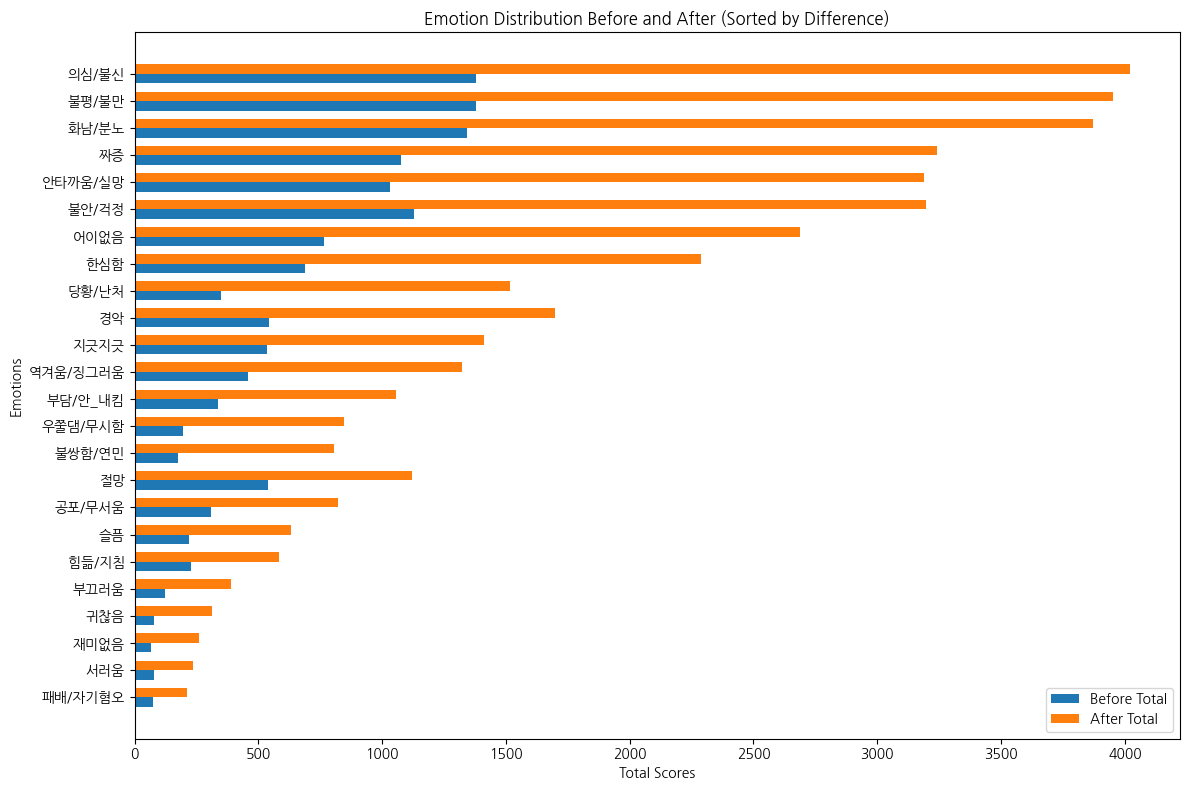

In [ ]:
# Define the specific labels to plot
LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '경악', '불안/걱정', '당황/난처']

# Filter the dataframes to include only the specified labels
before_filtered = before_df[LABELS]
after_filtered = after_df[LABELS]

# Sum the values for each emotion in the before and after datasets
before_sums = before_filtered.sum()
after_sums = after_filtered.sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before Total': before_sums,
    'After Total': after_sums
})

# Calculate the difference
comparison_df['Difference'] = comparison_df['After Total'] - comparison_df['Before Total']

# Sort by difference (descending order)
sorted_by_difference = comparison_df.sort_values(by='Difference')

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Total'], bar_width, label='Before Total')
    bar2 = ax.barh(index + bar_width, df['After Total'], bar_width, label='After Total')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot sorted by difference
plot_emotions(sorted_by_difference, 'Emotion Distribution Before and After (Sorted by Difference)')


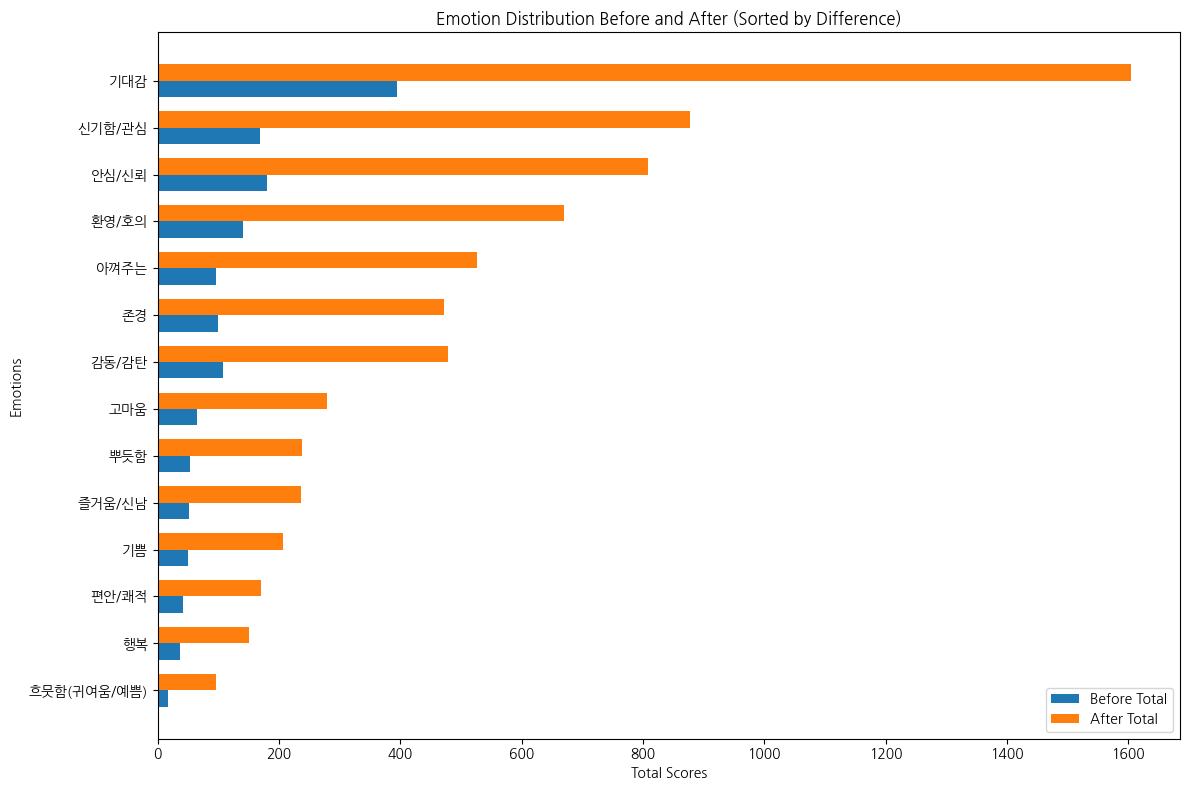

In [ ]:
# Define the specific labels to plot
LABELS = ['환영/호의', '감동/감탄', '고마움', '존경', '기대감', '뿌듯함',
          '편안/쾌적', '신기함/관심', '아껴주는', '즐거움/신남',
          '흐뭇함(귀여움/예쁨)', '행복', '기쁨', '안심/신뢰']

# Filter the dataframes to include only the specified labels
before_filtered = before_df[LABELS]
after_filtered = after_df[LABELS]

# Sum the values for each emotion in the before and after datasets
before_sums = before_filtered.sum()
after_sums = after_filtered.sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before Total': before_sums,
    'After Total': after_sums
})

# Calculate the difference
comparison_df['Difference'] = comparison_df['After Total'] - comparison_df['Before Total']

# Sort by difference (descending order)
sorted_by_difference = comparison_df.sort_values(by='Difference')

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Total'], bar_width, label='Before Total')
    bar2 = ax.barh(index + bar_width, df['After Total'], bar_width, label='After Total')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot sorted by difference
plot_emotions(sorted_by_difference, 'Emotion Distribution Before and After (Sorted by Difference)')


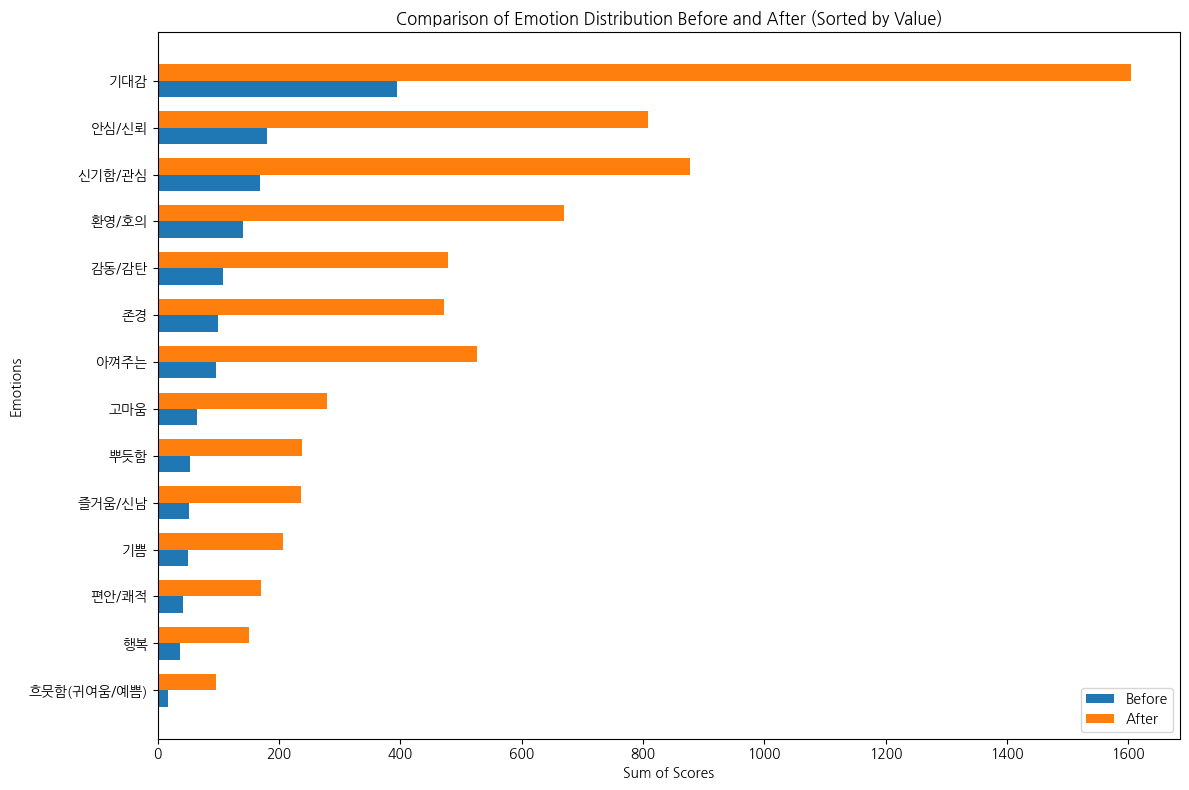

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['환영/호의', '감동/감탄', '고마움', '존경', '기대감', '뿌듯함',
          '편안/쾌적', '신기함/관심', '아껴주는', '즐거움/신남',
          '흐뭇함(귀여움/예쁨)', '행복', '기쁨', '안심/신뢰']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 특정 레이블의 합계 계산
sum_before = before_data[LABELS].sum()
sum_after = after_data[LABELS].sum()

# 선택한 레이블의 값만 추출 및 높은 값 순서대로 정렬
sorted_indices = np.argsort(sum_before.values)[::-1]
sorted_labels = [LABELS[i] for i in sorted_indices]
sorted_sum_before = [sum_before.values[i] for i in sorted_indices]
sorted_sum_after = [sum_after.values[i] for i in sorted_indices]

# 높은 값이 위로 오도록 뒤집기
sorted_labels = sorted_labels[::-1]
sorted_sum_before = sorted_sum_before[::-1]
sorted_sum_after = sorted_sum_after[::-1]

# 레이블별 분포 비교 시각화 (다중 막대 그래프)
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(sorted_labels))

bar1 = ax.barh(index, sorted_sum_before, bar_width, label='Before')
bar2 = ax.barh(index + bar_width, sorted_sum_after, bar_width, label='After')

ax.set_ylabel('Emotions')
ax.set_xlabel('Sum of Scores')
ax.set_title('Comparison of Emotion Distribution Before and After (Sorted by Value)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_labels)
ax.legend()

plt.tight_layout()
plt.show()


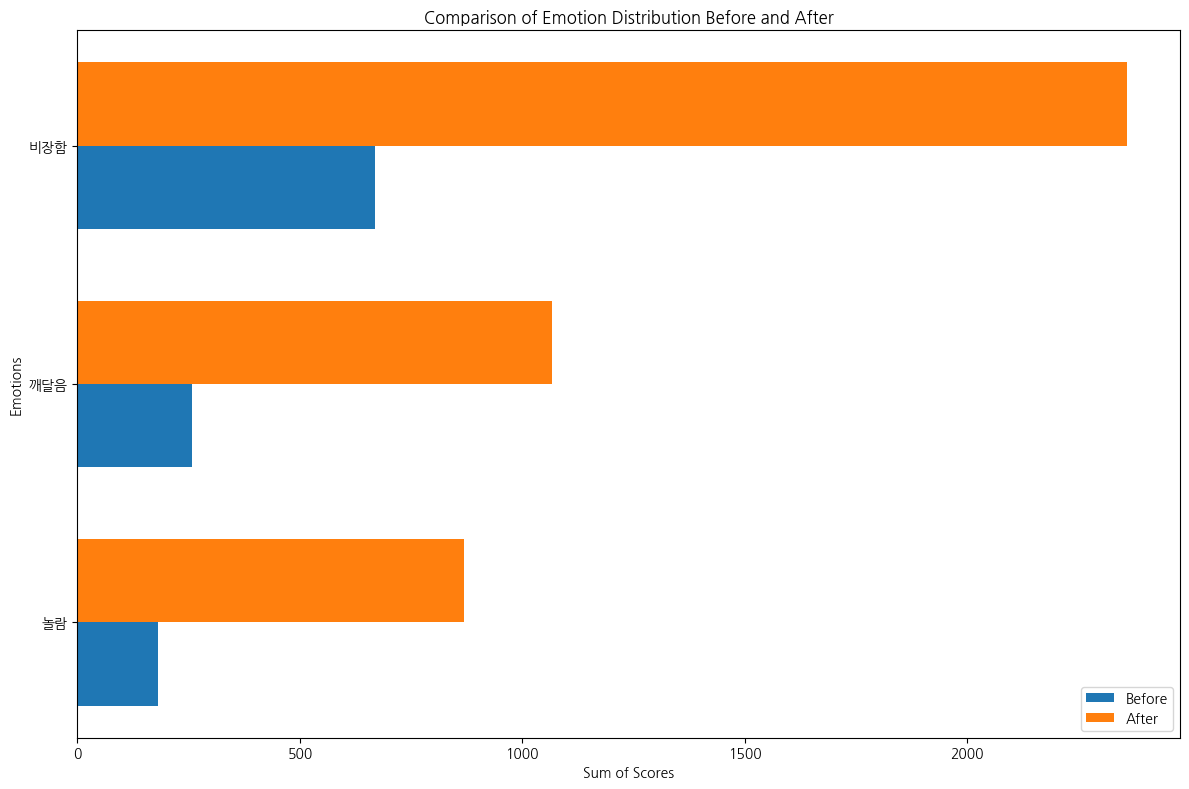

In [ ]:
LABELS = ['비장함', '깨달음', '놀람']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 특정 레이블의 합계 계산
sum_before = before_data[LABELS].sum()
sum_after = after_data[LABELS].sum()

# 선택한 레이블의 값만 추출 및 높은 값 순서대로 정렬
sorted_indices = np.argsort(sum_before.values)[::-1]
sorted_labels = [LABELS[i] for i in sorted_indices]
sorted_sum_before = [sum_before.values[i] for i in sorted_indices]
sorted_sum_after = [sum_after.values[i] for i in sorted_indices]

# 높은 값이 위로 오도록 뒤집기
sorted_labels = sorted_labels[::-1]
sorted_sum_before = sorted_sum_before[::-1]
sorted_sum_after = sorted_sum_after[::-1]

# 레이블별 분포 비교 시각화 (다중 막대 그래프)
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(sorted_labels))

bar1 = ax.barh(index, sorted_sum_before, bar_width, label='Before')
bar2 = ax.barh(index + bar_width, sorted_sum_after, bar_width, label='After')

ax.set_ylabel('Emotions')
ax.set_xlabel('Sum of Scores')
ax.set_title('Comparison of Emotion Distribution Before and After')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_labels)
ax.legend()

plt.tight_layout()
plt.show()

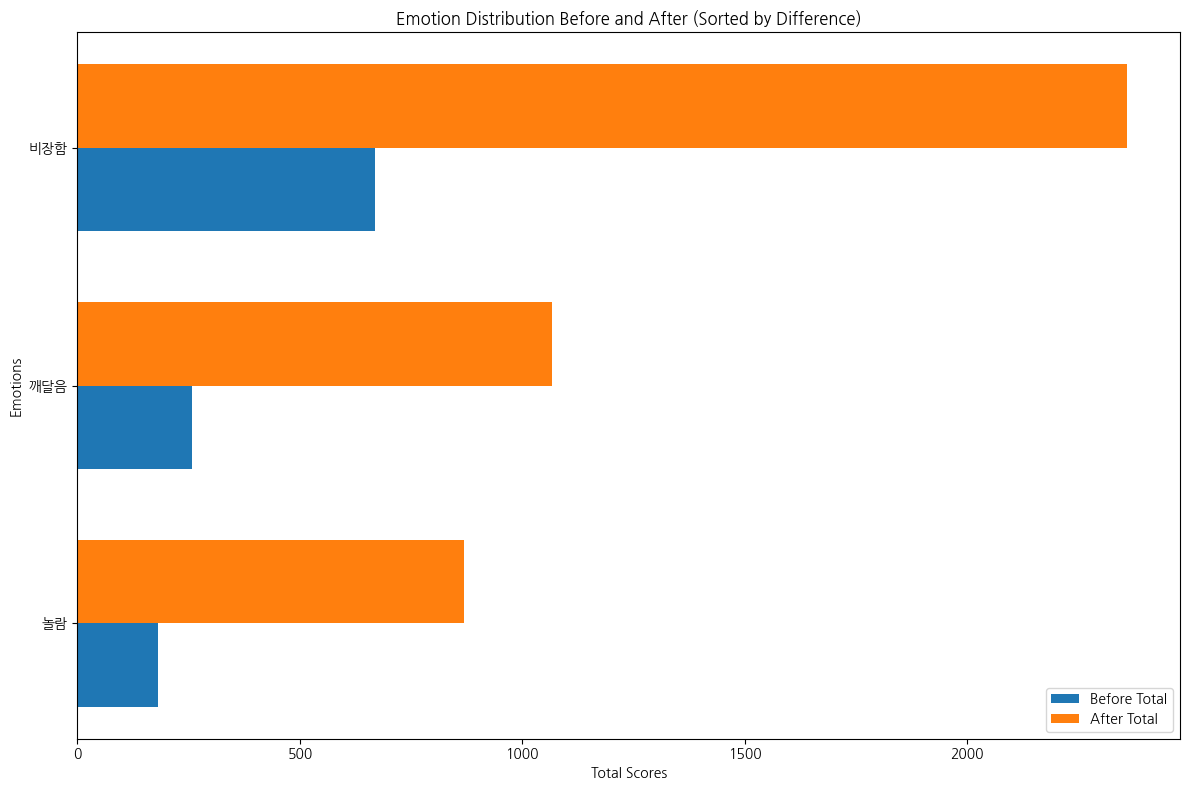

In [ ]:
LABELS = ['비장함', '깨달음', '놀람']

# Filter the dataframes to include only the specified labels
before_filtered = before_df[LABELS]
after_filtered = after_df[LABELS]

# Sum the values for each emotion in the before and after datasets
before_sums = before_filtered.sum()
after_sums = after_filtered.sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before Total': before_sums,
    'After Total': after_sums
})

# Calculate the difference
comparison_df['Difference'] = comparison_df['After Total'] - comparison_df['Before Total']

# Sort by difference (descending order)
sorted_by_difference = comparison_df.sort_values(by='Difference')

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Total'], bar_width, label='Before Total')
    bar2 = ax.barh(index + bar_width, df['After Total'], bar_width, label='After Total')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Total Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot sorted by difference
plot_emotions(sorted_by_difference, 'Emotion Distribution Before and After (Sorted by Difference)')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


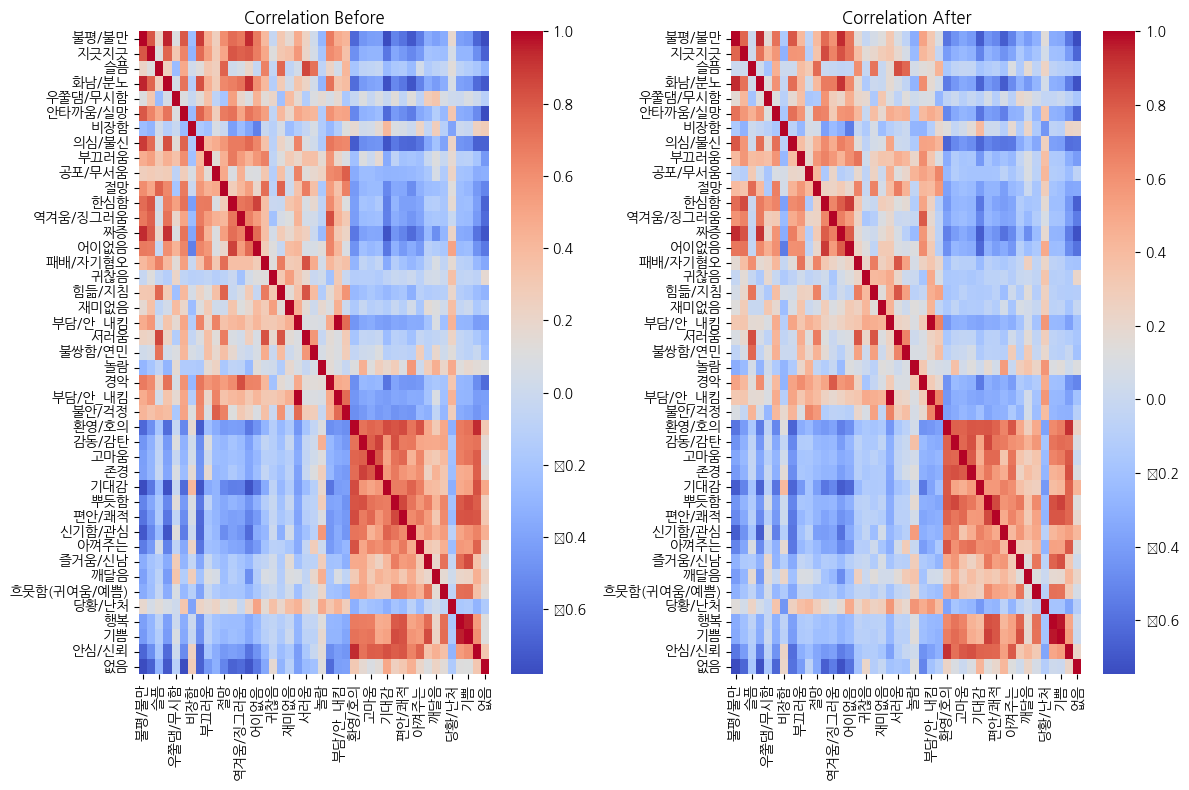

In [ ]:
# 레이블 간의 상관 관계 비교
import seaborn as sns

# 두 데이터셋의 레이블 간의 상관 관계 계산
correlation_before = result_before_df[LABELS].corr()
correlation_after = result_after_df[LABELS].corr()

# 레이블 간의 상관 관계 비교 시각화
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_before, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Before')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_after, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation After')

plt.tight_layout()
plt.show()

# 정규화: 평균값

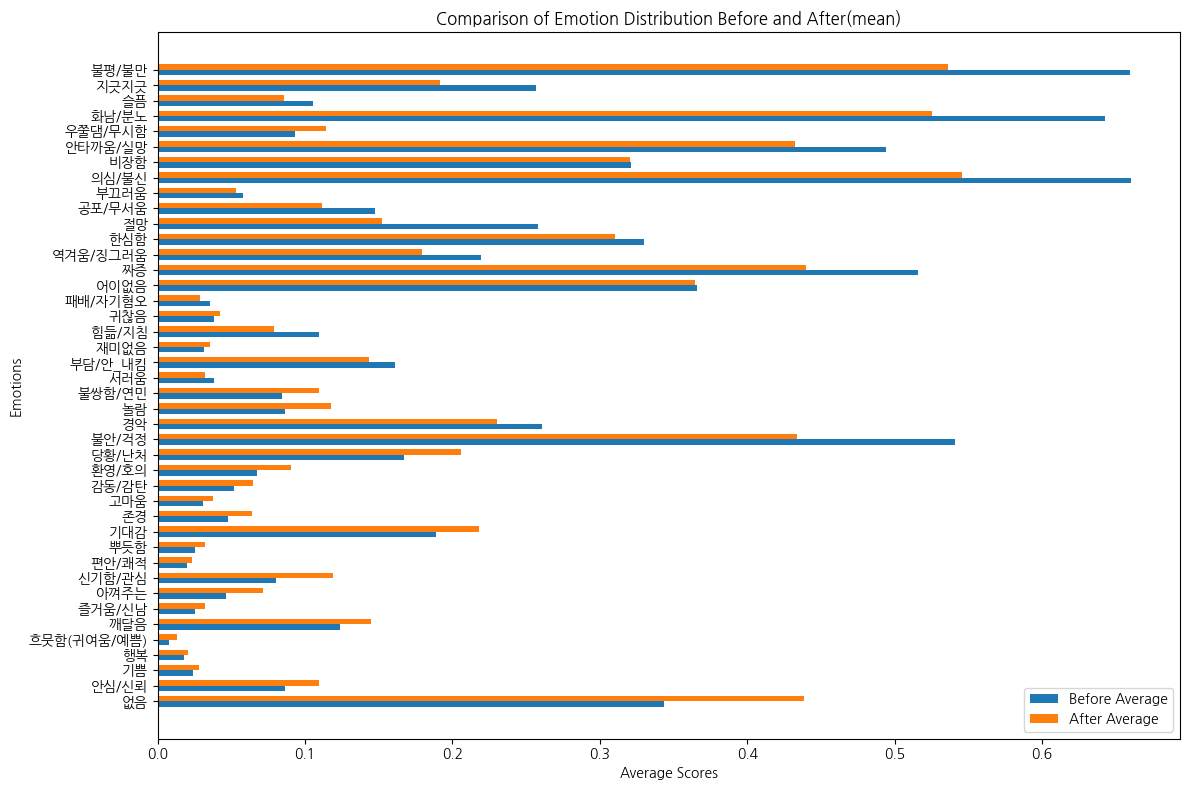

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# LABELS 리스트를 뒤집기
LABELS_REVERSED = LABELS[::-1]

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(LABELS_REVERSED))

bar1 = ax.barh(index, average_before[::-1], bar_width, label='Before Average')
bar2 = ax.barh(index + bar_width, average_after[::-1], bar_width, label='After Average')

ax.set_ylabel('Emotions')
ax.set_xlabel('Average Scores')
ax.set_title('Comparison of Emotion Distribution Before and After(mean)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(LABELS_REVERSED)
ax.legend()

plt.tight_layout()
plt.show()


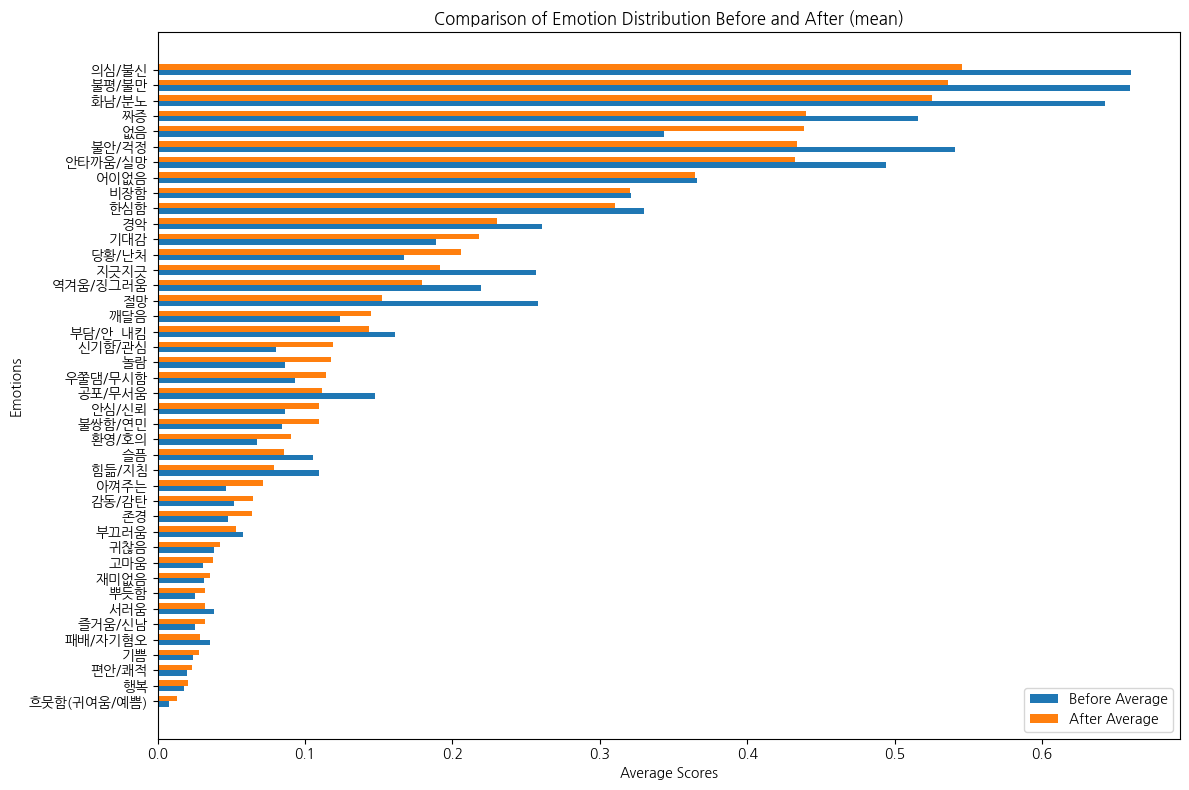

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# 'After Average' 기준으로 내림차순 정렬
average_comparison_df_sorted = average_comparison_df.sort_values(by='After Average', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(LABELS))

bar1 = ax.barh(index, average_comparison_df_sorted['Before Average'], bar_width, label='Before Average')
bar2 = ax.barh(index + bar_width, average_comparison_df_sorted['After Average'], bar_width, label='After Average')

ax.set_ylabel('Emotions')
ax.set_xlabel('Average Scores')
ax.set_title('Comparison of Emotion Distribution Before and After (mean)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(average_comparison_df_sorted.index)
ax.legend()

plt.tight_layout()
plt.show()


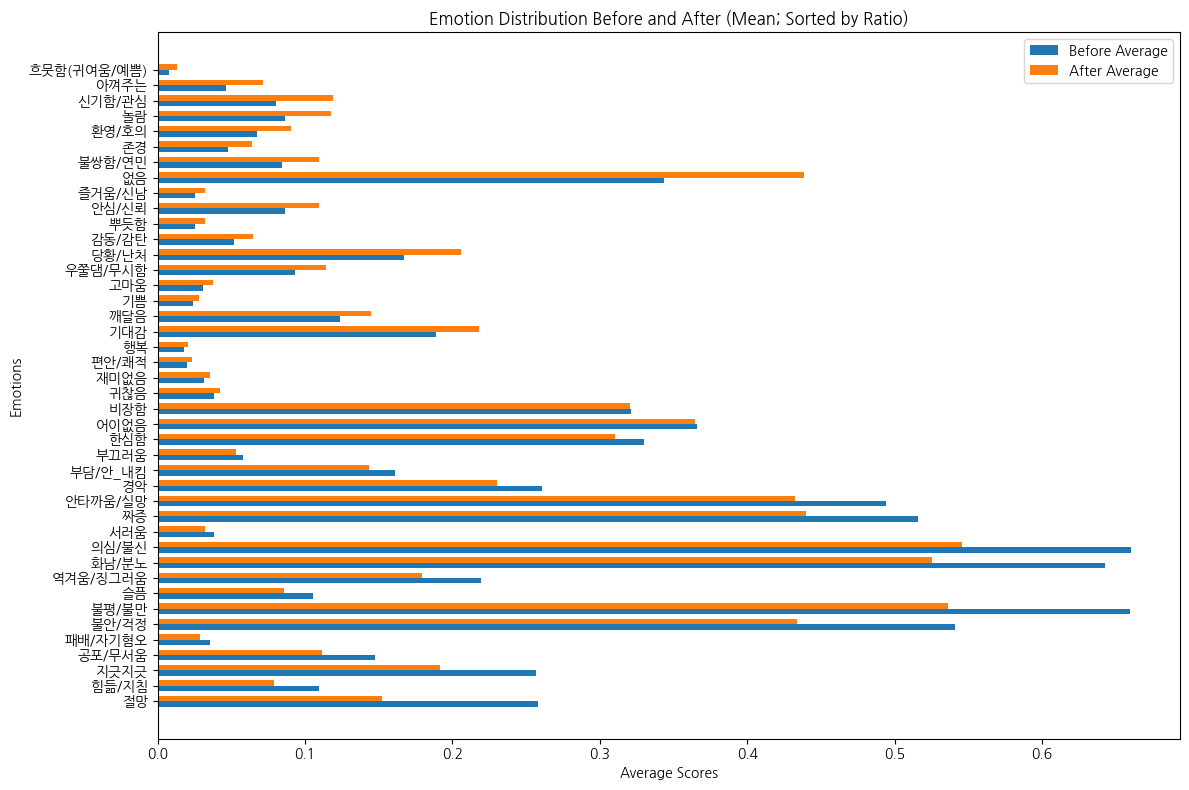

In [ ]:
LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '비장함', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '놀람', '경악', '불안/걱정', '당황/난처', '환영/호의', '감동/감탄',
          '고마움', '존경', '기대감', '뿌듯함', '편안/쾌적', '신기함/관심',
          '아껴주는', '즐거움/신남', '깨달음', '흐뭇함(귀여움/예쁨)',
          '행복', '기쁨', '안심/신뢰', '없음']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# 비율 계산을 위한 새로운 컬럼 추가
# 0으로 나누는 것을 방지하기 위해 작은 수를 분모에 추가합니다.
average_comparison_df['Ratio'] = average_comparison_df['After Average'] / (average_comparison_df['Before Average'] + 1e-8)

# 비율로 정렬 (내림차순)
sorted_by_ratio = average_comparison_df.sort_values(by='Ratio', ascending=True)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Average'], bar_width, label='Before Average')
    bar2 = ax.barh(index + bar_width, df['After Average'], bar_width, label='After Average')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Average Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 비율로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_by_ratio, 'Emotion Distribution Before and After (Mean; Sorted by Ratio)')

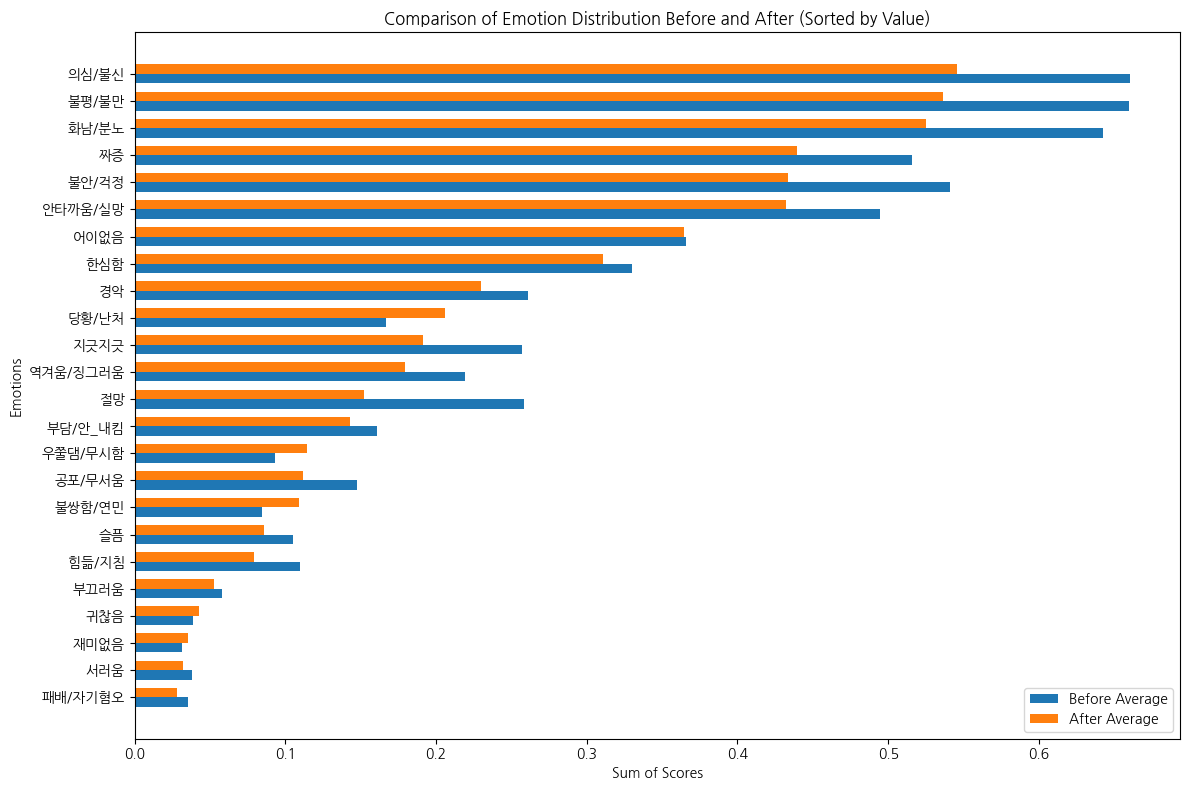

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '경악', '불안/걱정', '당황/난처']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# 선택한 레이블의 값만 추출 및 높은 값 순서대로 정렬
sorted_indices = np.argsort(average_after.values)[::-1]
sorted_labels = [LABELS[i] for i in sorted_indices]
sorted_sum_before = [average_before.values[i] for i in sorted_indices]
sorted_sum_after = [average_after.values[i] for i in sorted_indices]

# 높은 값이 위로 오도록 뒤집기
sorted_labels = sorted_labels[::-1]
sorted_sum_before = sorted_sum_before[::-1]
sorted_sum_after = sorted_sum_after[::-1]

# 레이블별 분포 비교 시각화 (다중 막대 그래프)
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(sorted_labels))

bar1 = ax.barh(index, sorted_sum_before, bar_width, label='Before Average')
bar2 = ax.barh(index + bar_width, sorted_sum_after, bar_width, label='After Average')

ax.set_ylabel('Emotions')
ax.set_xlabel('Sum of Scores')
ax.set_title('Comparison of Emotion Distribution Before and After (Sorted by Value)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_labels)
ax.legend()

plt.tight_layout()
plt.show()


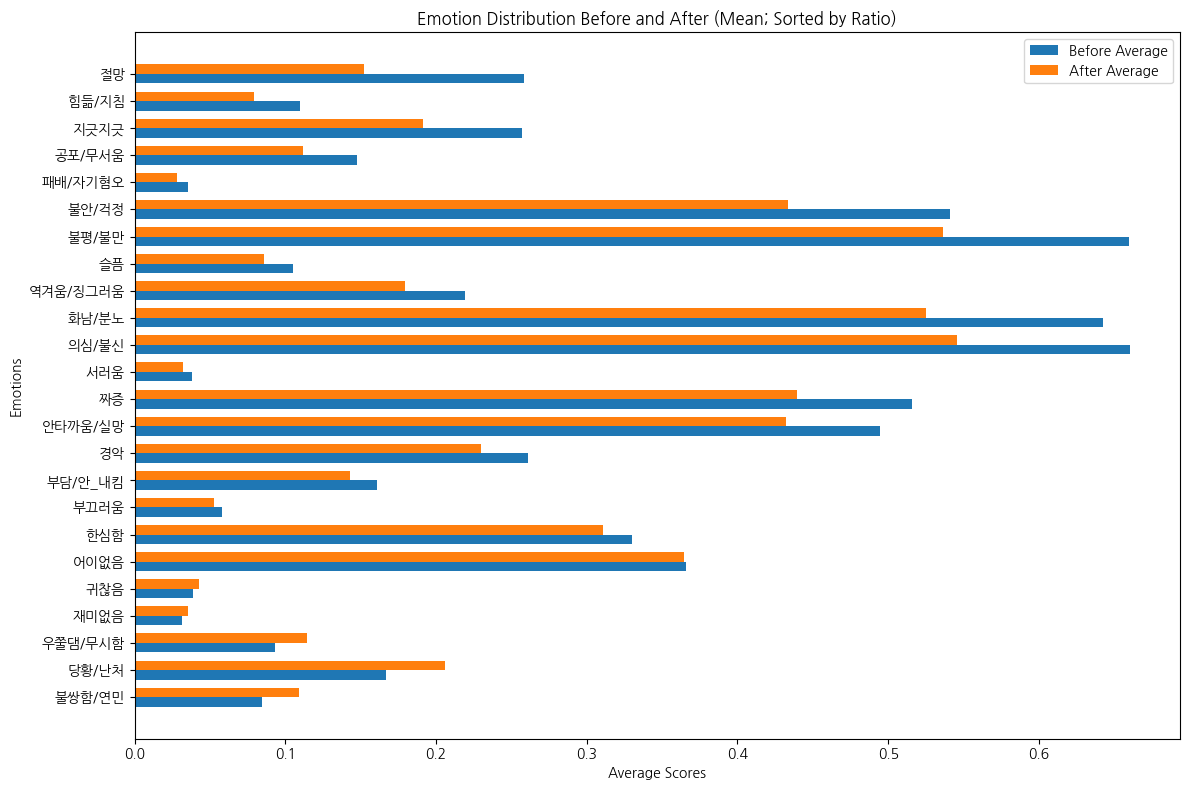

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '경악', '불안/걱정', '당황/난처']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# 비율 계산을 위한 새로운 컬럼 추가
average_comparison_df['Ratio'] = (average_comparison_df['After Average'] + 1e-8) / (average_comparison_df['Before Average'] + 1e-8)

# 비율의 절대값으로 정렬 (내림차순)
sorted_by_ratio = average_comparison_df.sort_values(by='Ratio', ascending=False, key=abs)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Average'], bar_width, label='Before Average')
    bar2 = ax.barh(index + bar_width, df['After Average'], bar_width, label='After Average')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Average Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 비율로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_by_ratio, 'Emotion Distribution Before and After (Mean; Sorted by Ratio)')


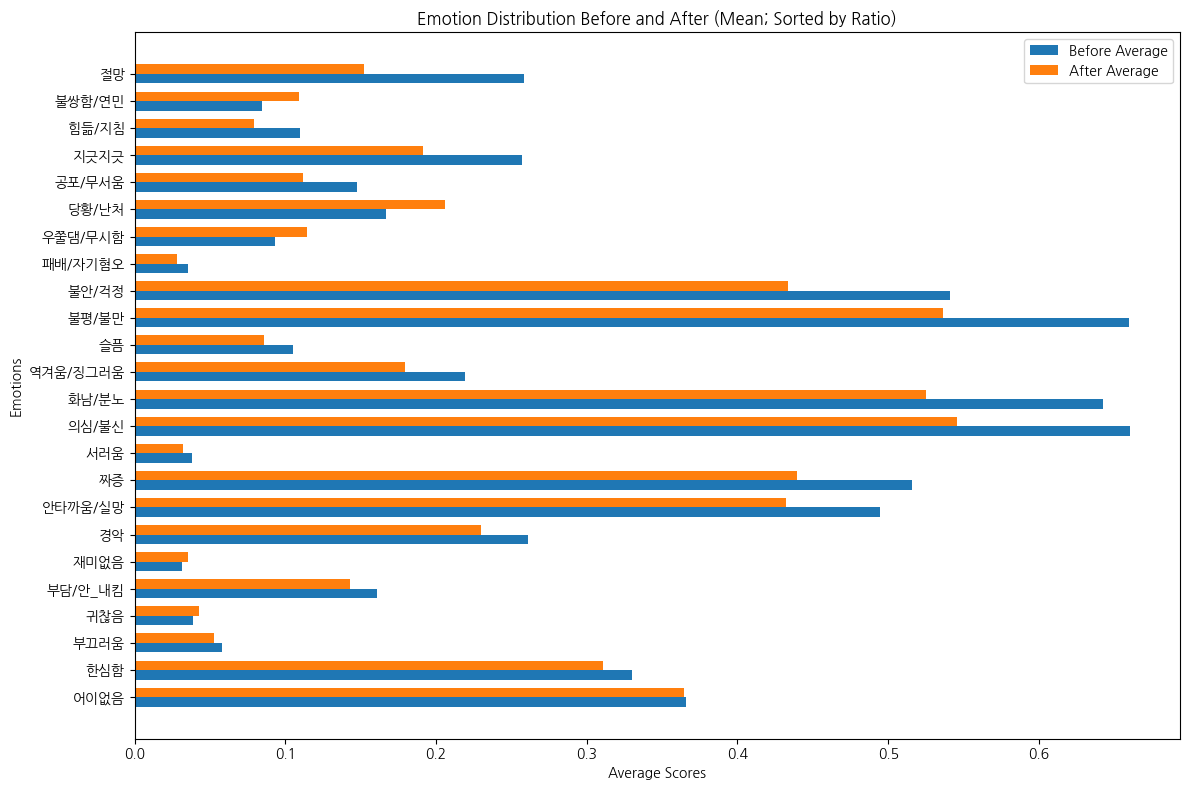

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['불평/불만', '지긋지긋', '슬픔', '화남/분노', '우쭐댐/무시함',
          '안타까움/실망', '의심/불신', '부끄러움', '공포/무서움',
          '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '패배/자기혐오',
          '귀찮음', '힘듦/지침', '재미없음', '부담/안_내킴', '서러움', '불쌍함/연민',
          '경악', '불안/걱정', '당황/난처']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# 비율 계산을 위한 새로운 컬럼 추가
average_comparison_df['Ratio'] = (average_comparison_df['After Average'] + 1e-8) / (average_comparison_df['Before Average'] + 1e-8)

# 비율과 1과의 차이의 절대값으로 정렬 (오름차순)
sorted_by_ratio = average_comparison_df.assign(diff=abs(average_comparison_df['Ratio'] - 1)).sort_values(by='diff', ascending=True)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Average'], bar_width, label='Before Average')
    bar2 = ax.barh(index + bar_width, df['After Average'], bar_width, label='After Average')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Average Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 비율로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_by_ratio, 'Emotion Distribution Before and After (Mean; Sorted by Ratio)')


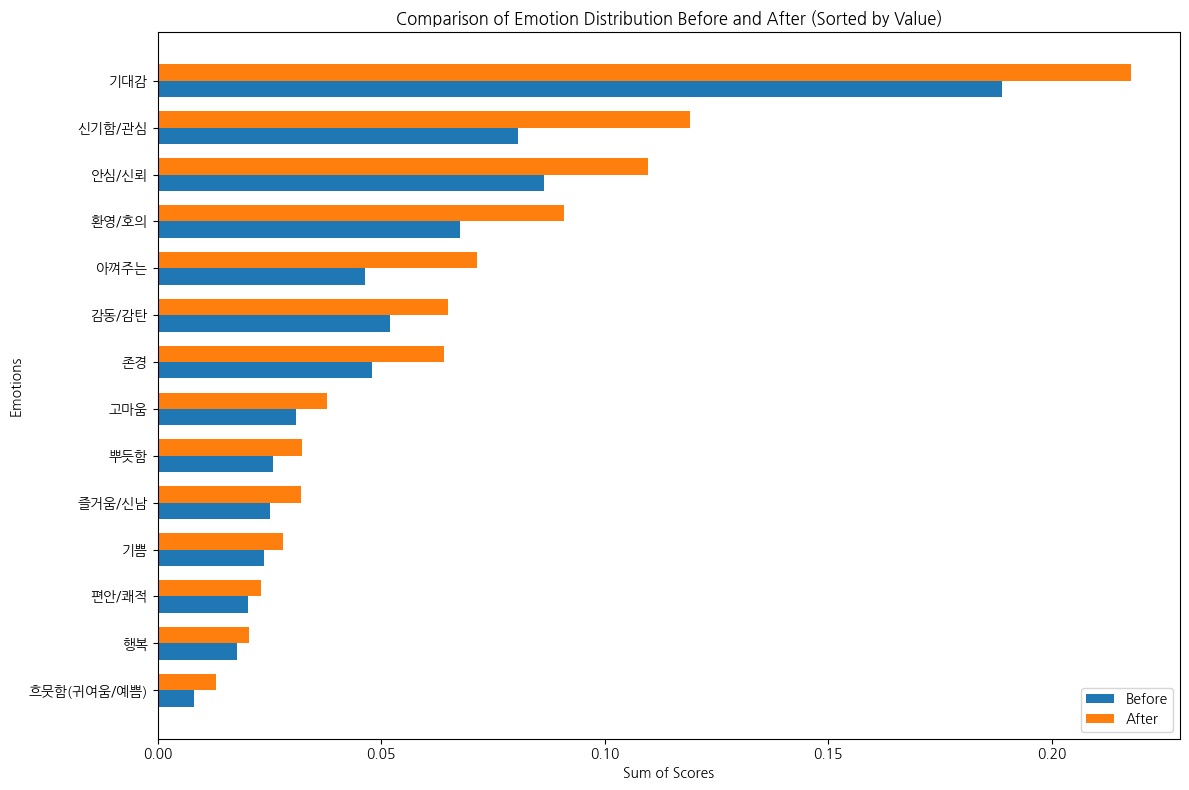

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['환영/호의', '감동/감탄', '고마움', '존경', '기대감', '뿌듯함',
          '편안/쾌적', '신기함/관심', '아껴주는', '즐거움/신남',
          '흐뭇함(귀여움/예쁨)', '행복', '기쁨', '안심/신뢰']


# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# 선택한 레이블의 값만 추출 및 높은 값 순서대로 정렬
sorted_indices = np.argsort(average_after.values)[::-1]
sorted_labels = [LABELS[i] for i in sorted_indices]
sorted_sum_before = [average_before.values[i] for i in sorted_indices]
sorted_sum_after = [average_after.values[i] for i in sorted_indices]

# 높은 값이 위로 오도록 뒤집기
sorted_labels = sorted_labels[::-1]
sorted_sum_before = sorted_sum_before[::-1]
sorted_sum_after = sorted_sum_after[::-1]

# 레이블별 분포 비교 시각화 (다중 막대 그래프)
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(sorted_labels))

bar1 = ax.barh(index, sorted_sum_before, bar_width, label='Before')
bar2 = ax.barh(index + bar_width, sorted_sum_after, bar_width, label='After')

ax.set_ylabel('Emotions')
ax.set_xlabel('Sum of Scores')
ax.set_title('Comparison of Emotion Distribution Before and After (Sorted by Value)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_labels)
ax.legend()

plt.tight_layout()
plt.show()


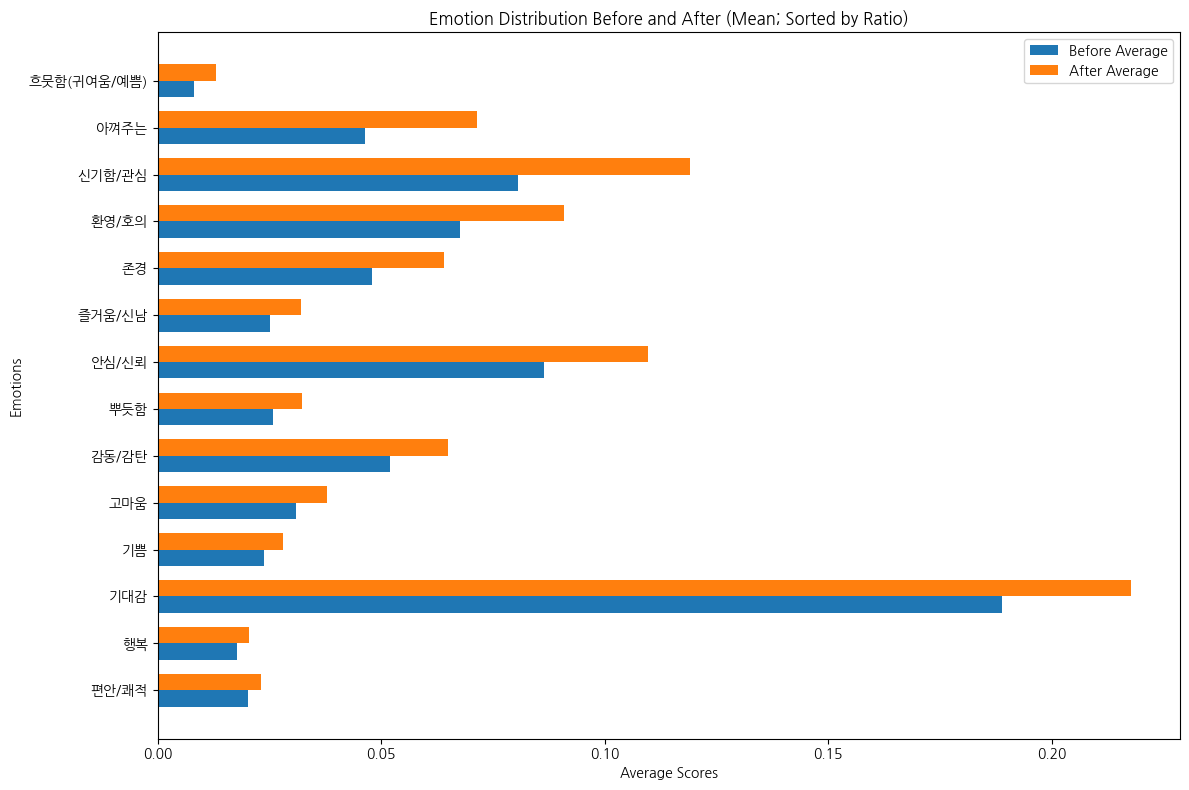

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['환영/호의', '감동/감탄', '고마움', '존경', '기대감', '뿌듯함',
          '편안/쾌적', '신기함/관심', '아껴주는', '즐거움/신남',
          '흐뭇함(귀여움/예쁨)', '행복', '기쁨', '안심/신뢰']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# 비율 계산을 위한 새로운 컬럼 추가
average_comparison_df['Ratio'] = (average_comparison_df['After Average'] + 1e-8) / (average_comparison_df['Before Average'] + 1e-8)

# 비율과 1과의 차이의 절대값으로 정렬 (오름차순)
sorted_by_ratio = average_comparison_df.assign(diff=abs(average_comparison_df['Ratio'] - 1)).sort_values(by='diff', ascending=True)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Average'], bar_width, label='Before Average')
    bar2 = ax.barh(index + bar_width, df['After Average'], bar_width, label='After Average')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Average Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 비율로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_by_ratio, 'Emotion Distribution Before and After (Mean; Sorted by Ratio)')


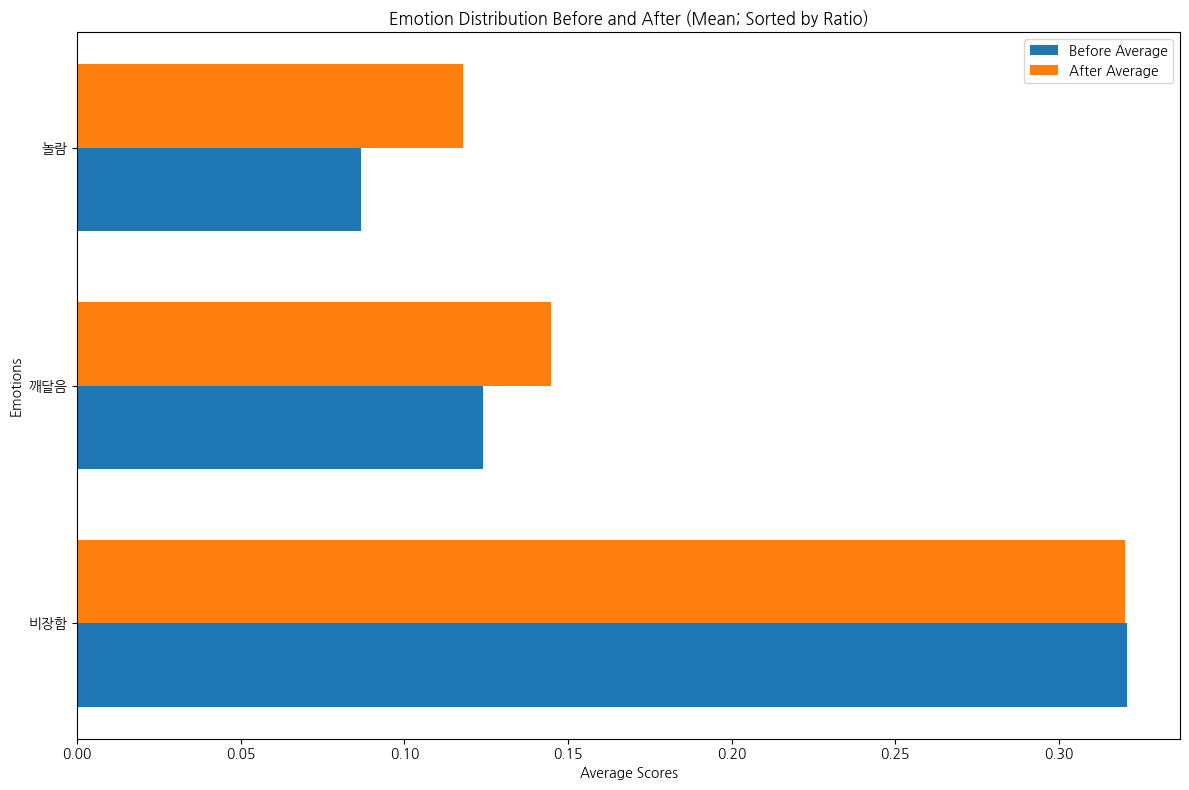

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LABELS = ['비장함', '깨달음', '놀람']

# 데이터 로드
before_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_before_analysis.xlsx')
after_data = pd.read_excel('/content/drive/My Drive/Twitter_refugee_after_analysis.xlsx')

# 각 데이터셋의 평균값 계산
average_before = before_data[LABELS].mean()
average_after = after_data[LABELS].mean()

# Combine the results into a single DataFrame for comparison
average_comparison_df = pd.DataFrame({
    'Before Average': average_before,
    'After Average': average_after
})

# 비율 계산을 위한 새로운 컬럼 추가
average_comparison_df['Ratio'] = (average_comparison_df['After Average'] + 1e-8) / (average_comparison_df['Before Average'] + 1e-8)

# 비율과 1과의 차이의 절대값으로 정렬 (오름차순)
sorted_by_ratio = average_comparison_df.assign(diff=abs(average_comparison_df['Ratio'] - 1)).sort_values(by='diff', ascending=True)

# Plotting function
def plot_emotions(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(df))

    bar1 = ax.barh(index, df['Before Average'], bar_width, label='Before Average')
    bar2 = ax.barh(index + bar_width, df['After Average'], bar_width, label='After Average')

    ax.set_ylabel('Emotions')
    ax.set_xlabel('Average Scores')
    ax.set_title(title)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(df.index)
    ax.legend()

    plt.tight_layout()
    plt.show()

# 비율로 정렬된 데이터로 감정 분포 플롯
plot_emotions(sorted_by_ratio, 'Emotion Distribution Before and After (Mean; Sorted by Ratio)')


# 레이블 긍/부/중 변경

# 레이블 변경: Pierce 2021